In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.append('..')


In [3]:
import autograd.numpy as np


In [4]:
from utils.models import BNN


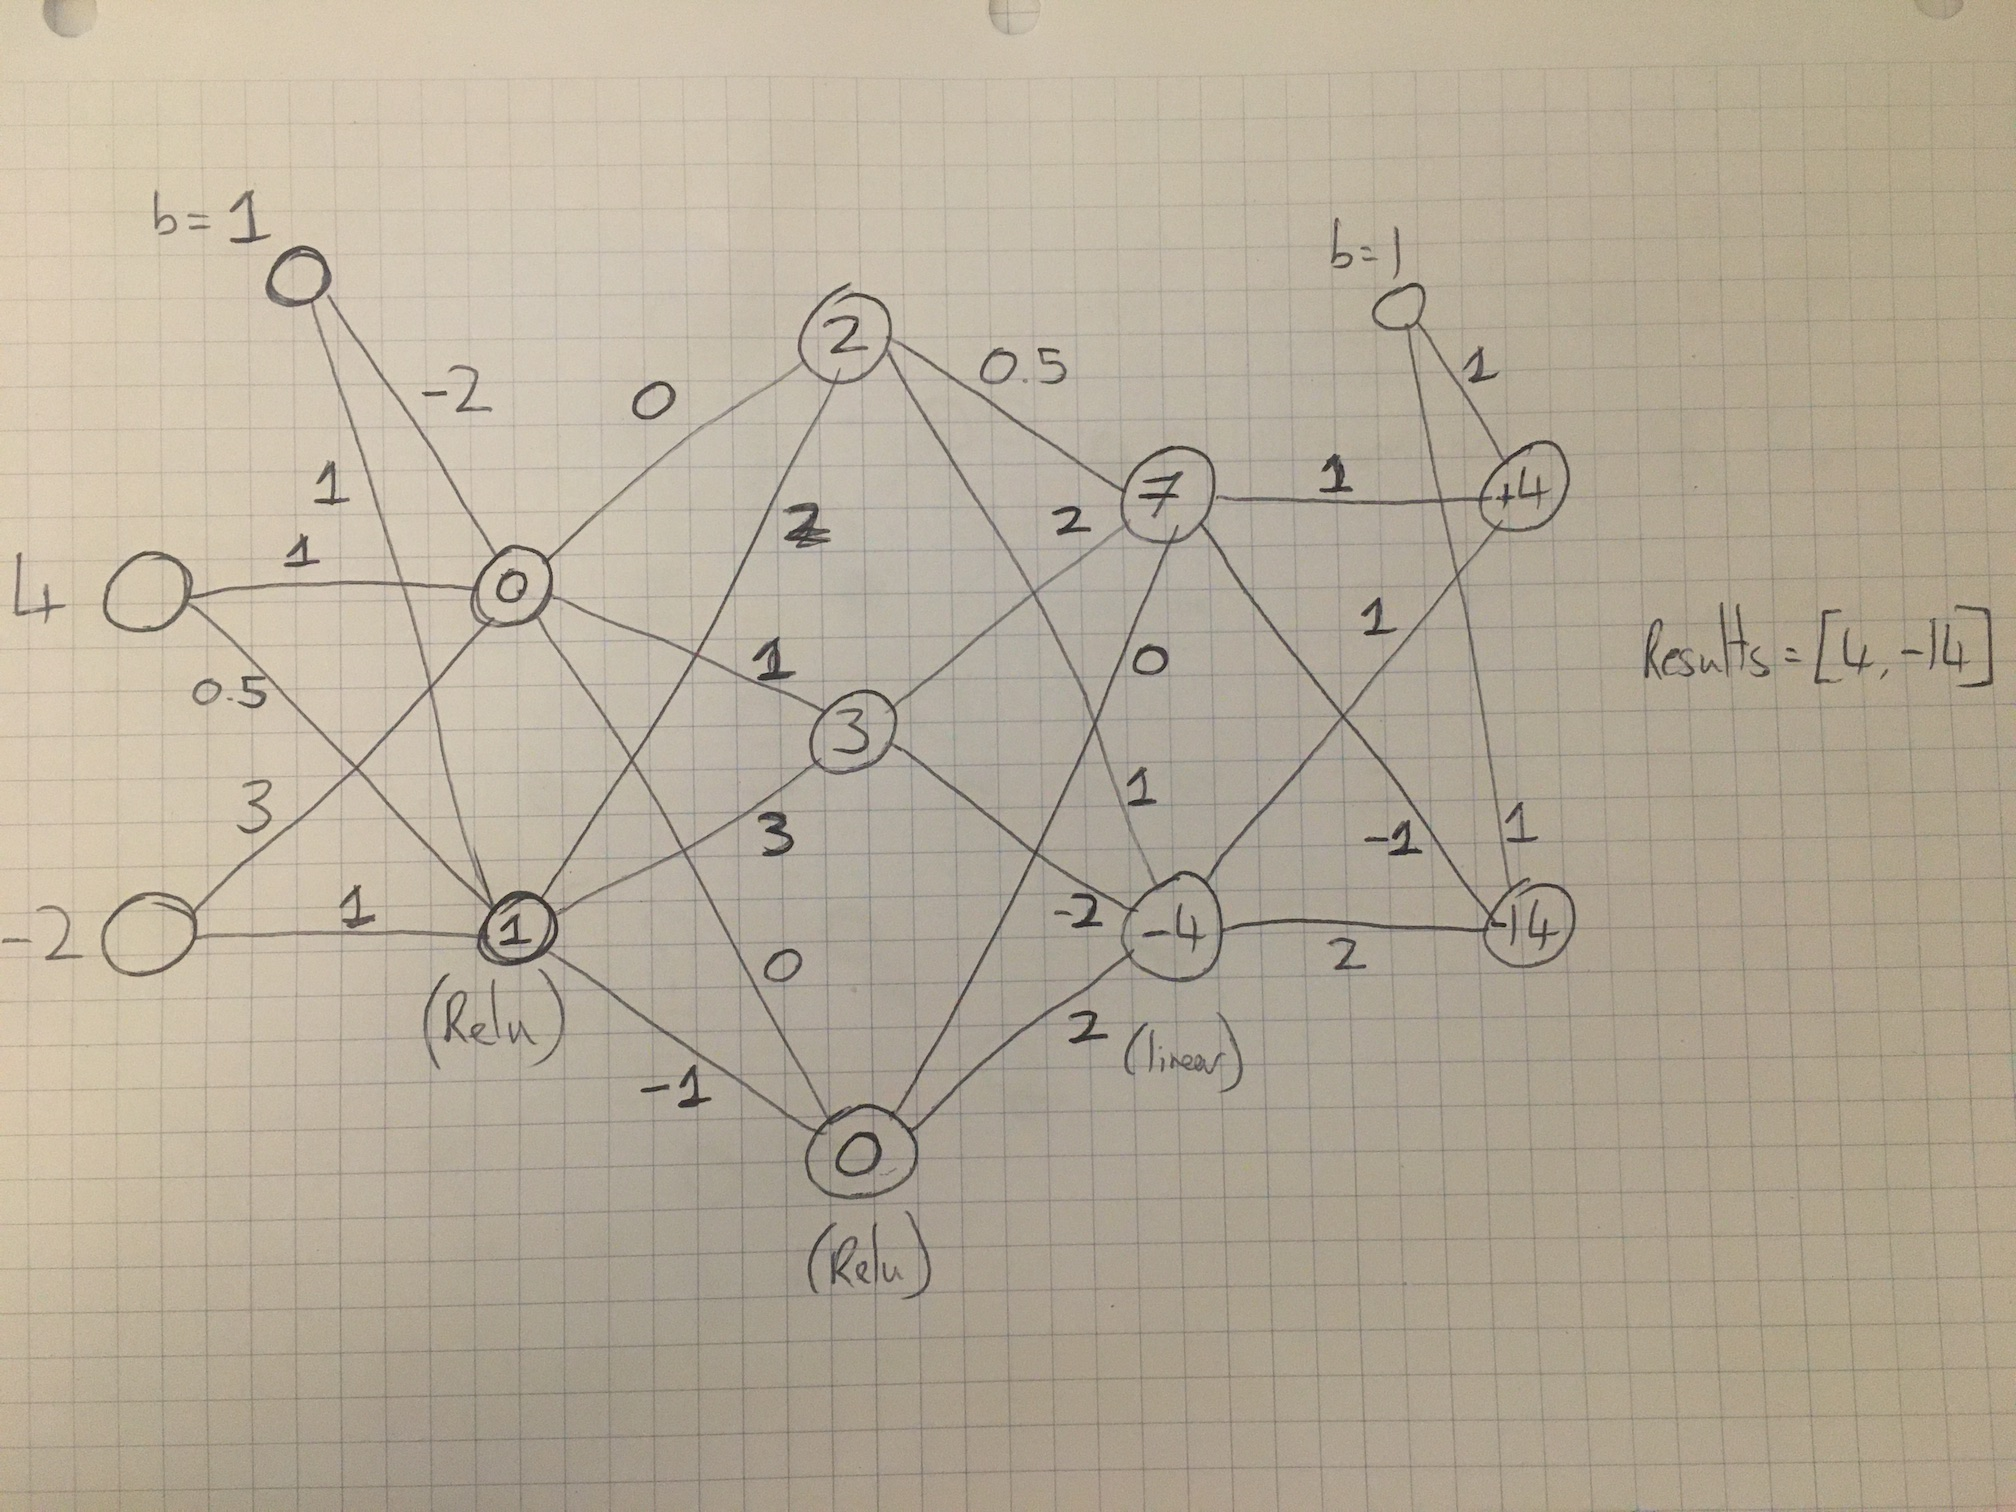

In [5]:
from IPython.display import display, Image
display(Image(filename='../imgs/neural_net_unit_test_schematic.JPG'))


In [6]:
hidden_layers = [2,3,2]
biases =      [1,0,0,1]
activations = ['relu','relu','linear','linear']

architecture = {
    'input_n' : 2,
    'output_n' : 2,
    'hidden_layers' : hidden_layers,
    'biases' : biases,
    'activations' : activations,
}

layer1 = np.array([
    [ 1, 0.5],
    [ 3,   1],
    [-2,   1],
])

layer2 = np.array([
    [0, 1,  0],
    [2, 3, -1],
])

layer3 = np.array([
    [0.5,  1],
    [  2, -2],
    [  0,  2],
])

layer4 = np.array([
    [1, -1],
    [1,  2],
    [1,  1],
])

# layer5 = np.array([
#     [1, 0],
#     [0, 1],
# ])

W_layers = [layer1,layer2,layer3,layer4]

X = np.array([[4,-2]])
Y = np.array([[4,-14]])

# Calculate output for each layer:
partial_networks = []
for i in range(1,len(W_layers)+1):
    arch = architecture.copy()
    arch['hidden_layers'] = hidden_layers[:(i-1)]
    arch['biases'] = biases[:i]
    arch['activations'] = activations[:i]
    if i < len(W_layers):
        arch['output_n'] = hidden_layers[i-1]

    bnn = BNN(arch)
    bnn.set_weights(W_layers[:i])
    partial_networks.append(bnn)

    print(f"Layer {i} :",bnn.forward(X))
    
bnn = BNN(architecture)
bnn.set_weights(W_layers)


Layer 1 : [[0. 1.]]
Layer 2 : [[2. 3. 0.]]
Layer 3 : [[ 7. -4.]]
Layer 4 : [[  4. -14.]]


In [7]:
# from utils.models import BNN_LV

# arch = architecture
# arch['gamma'] = 0.4
# arch['sigma'] = [0.5,0.3]
# bnn_lv = BNN_LV(architecture)
# W_layers_lv = W_layers.copy()
# W_layers_lv[0] = np.array([
#     [ 1, 0.5],
#     [ 3,   1],
#     [ 1,   0],  # Noise feature.
#     [-2,   1],
# ])
# bnn_lv.set_weights(W_layers_lv)
# bnn_lv.forward(X)
